In [4]:
from matplotlib import patches
import matplotlib.pyplot as plt
from src.smth2matrix.shift2zero import shift2zero
import numpy as np
from src.greedy_alg.class_pallets import Pallets
from src.class_item import Item

from copy import copy

In [5]:
def draw_segments(item):

    n_x1 = 0
    n_y1 = 0
    for point in item.points:
        if point[0] > n_x1:
            n_x1 = copy(point[0])
        if point[1] > n_y1:
            n_y1 = copy(point[1])
    pallet_width = n_x1
    pallet_height = n_y1

    fig, ax = plt.subplots()

    ax.set_xlim(-0.5, pallet_width + 2)
    ax.set_ylim(-0.5, pallet_height + 2)

    for i in range(len(item.segments)):
        plt.plot([0, pallet_width], [i*h, i*h], color = 'black', linestyle=':')

    figure = patches.Polygon(item.points,
                                linewidth=1,
                                edgecolor='red',
                                fill=False)
    ax.add_patch(figure)

    for i in range(len(item.segments)):
        for sigment in item.segments[i]:
            if sigment[0] != sigment[1]:
                plt.plot(sigment, [i*h, i*h], color = 'blue')
            else:
                ax.scatter(sigment[0], i*h, color = 'blue', s = 4)

    plt.show()

[[[0, 0], [10, 10]], [[0, 0], [10, 10]], [[0, 0], [10, 10]], [[0, 0], [10, 10]], [[0, 0], [10, 10]], [[0, 0], [10, 10]], [[0, 0], [10, 10]], [[0, 0], [10, 10]], [[0, 0], [10, 10]], [[0, 0], [10, 10]]]


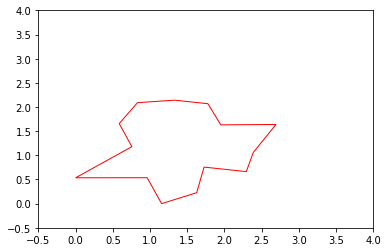

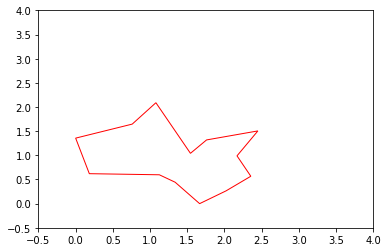

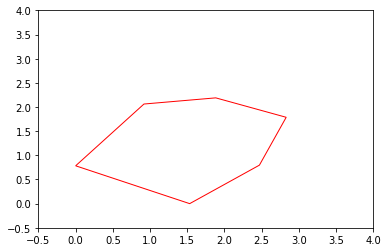

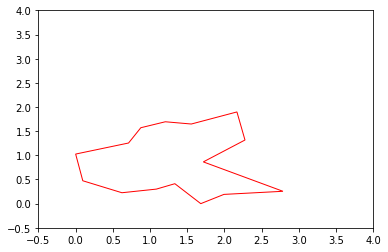

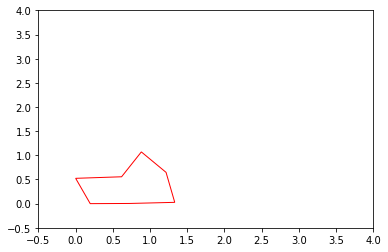

[[2.69237845 1.63793684]
 [1.95117113 1.63040555]
 [1.77754656 2.06814054]
 [1.33105288 2.14140241]
 [0.83088898 2.08956865]
 [0.58569905 1.65617245]
 [0.75592693 1.17908709]
 [0.         0.53517465]
 [0.96146073 0.53657551]
 [1.15535086 0.        ]
 [1.62681539 0.22654478]
 [1.72598599 0.75646797]
 [2.29371675 0.662793  ]
 [2.38733565 1.05880673]]
[[2.35439835 0.56682611]
 [2.16875126 0.98904251]
 [2.44932864 1.5049757 ]
 [1.7597245  1.31861811]
 [1.54303999 1.04130188]
 [1.07865184 2.08843785]
 [0.76041039 1.6459771 ]
 [0.         1.35575994]
 [0.18375051 0.62003102]
 [1.12479803 0.59726821]
 [1.33710847 0.44340024]
 [1.66641651 0.        ]
 [2.02125983 0.26415272]]
[[1.8829718  2.1891357 ]
 [0.91813093 2.06157577]
 [0.         0.78321165]
 [1.53272948 0.        ]
 [2.46978122 0.79650131]
 [2.82982098 1.78698899]]
[[2.27595331 1.31677084]
 [2.16772668 1.89781937]
 [1.55473952 1.64779112]
 [1.2052099  1.69440872]
 [0.87590571 1.57098183]
 [0.71104329 1.25479493]
 [0.         1.0260216

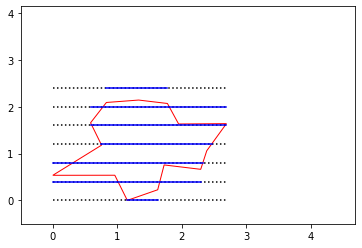

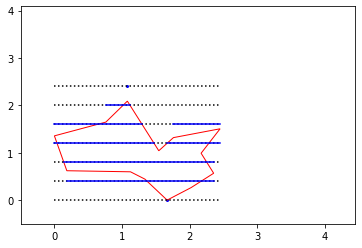

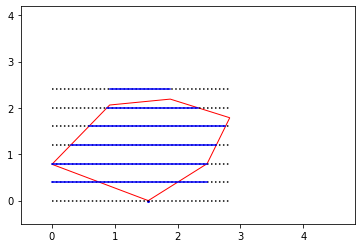

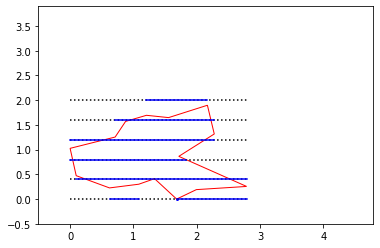

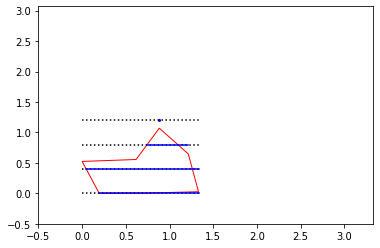

[[2.69237845 1.63793684]
 [1.95117113 1.63040555]
 [1.77754656 2.06814054]
 [1.33105288 2.14140241]
 [0.83088898 2.08956865]
 [0.58569905 1.65617245]
 [0.75592693 1.17908709]
 [0.         0.53517465]
 [0.96146073 0.53657551]
 [1.15535086 0.        ]
 [1.62681539 0.22654478]
 [1.72598599 0.75646797]
 [2.29371675 0.662793  ]
 [2.38733565 1.05880673]]
[[2.35439835 0.56682611]
 [2.16875126 0.98904251]
 [2.44932864 1.5049757 ]
 [1.7597245  1.31861811]
 [1.54303999 1.04130188]
 [1.07865184 2.08843785]
 [0.76041039 1.6459771 ]
 [0.         1.35575994]
 [0.18375051 0.62003102]
 [1.12479803 0.59726821]
 [1.33710847 0.44340024]
 [1.66641651 0.        ]
 [2.02125983 0.26415272]]
[[1.8829718  2.1891357 ]
 [0.91813093 2.06157577]
 [0.         0.78321165]
 [1.53272948 0.        ]
 [2.46978122 0.79650131]
 [2.82982098 1.78698899]]
[[2.27595331 1.31677084]
 [2.16772668 1.89781937]
 [1.55473952 1.64779112]
 [1.2052099  1.69440872]
 [0.87590571 1.57098183]
 [0.71104329 1.25479493]
 [0.         1.0260216

IndexError: list index out of range

In [6]:

# points = np.array([[0.3, 3], [1, 0], [2.1, 0], [3, 3.7]])
# shift2zero(points)
#
# h = 1
#
# item_1 = Item(1, points)
# item_1.set_segments(h)
#
# item_2 = Item(2, copy(points))
# item_2.set_segments(h)
#
# item_3 = Item(3, copy(points))
# item_3.set_segments(h)
#
# item_4 = Item(4, copy(points))
# item_4.set_segments(h)
#
# item_5 = Item(5, copy(points))
# item_5.set_segments(h)
#
# items = [copy(item_1), copy(item_2), copy(item_3), copy(item_4), copy(item_5)]

from src.class_packing import Packing
from src.smth2lines.polygon2segments import polygon2segments

h = 0.4

packaging = Packing(width=10, height=10, drill_radius=0)

pallets = Pallets([10, 10])
pallets.add_pallet_lines()

print(pallets.pallet_lines)

# packaging.items = items

packaging.create_random_polygons(num_items= 5)

for item in packaging.items:
    # print(item.points)
    fig, ax = plt.subplots()

    ax.set_xlim(-0.5, 4)
    ax.set_ylim(-0.5, 4)


    figure = patches.Polygon(item.points,
                                linewidth=1,
                                edgecolor='red',
                                fill=False)
    ax.add_patch(figure)
    plt.show()



packaging.pallets = pallets
packaging.h = h
for item in packaging.items:
    print(item.points)
packaging.add_segments_for_items()

for item in packaging.items:
    draw_segments(item)
for item in packaging.items:
    print(item.points)
packaging.segments_bottom_left()
for item in packaging.items:
    print(item.points)
packaging.draw_segments_packing()